# Gaming Industry Revenue Prediction using Regression.

### Load the dataset


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('./data/decoding-gaming-trends/train.csv')
data.head()


# print(data.shape)

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Battle Warriors 3,RPG,Xbox,2000,Sony,3928.96,33.84,12.00,96,No,Declining
1,Pixel Odyssey 5,Adventure,Cross-Platform,2013,Ubisoft,1304.97,162.57,37.76,91,Yes,Stable
2,Fantasy Rivals 2,Shooter,PC,2007,Sony,2690.57,164.85,70.99,85,No,Rising
3,Pixel Odyssey 1,Action,PC,2023,Microsoft,653.18,118.68,41.95,88,Yes,Stable
4,Shadow Realms 2,Action,Nintendo Switch,2016,Ubisoft,3157.66,64.07,17.56,84,Yes,Stable


### Plot the features against each other to figure out relationship between different parameters

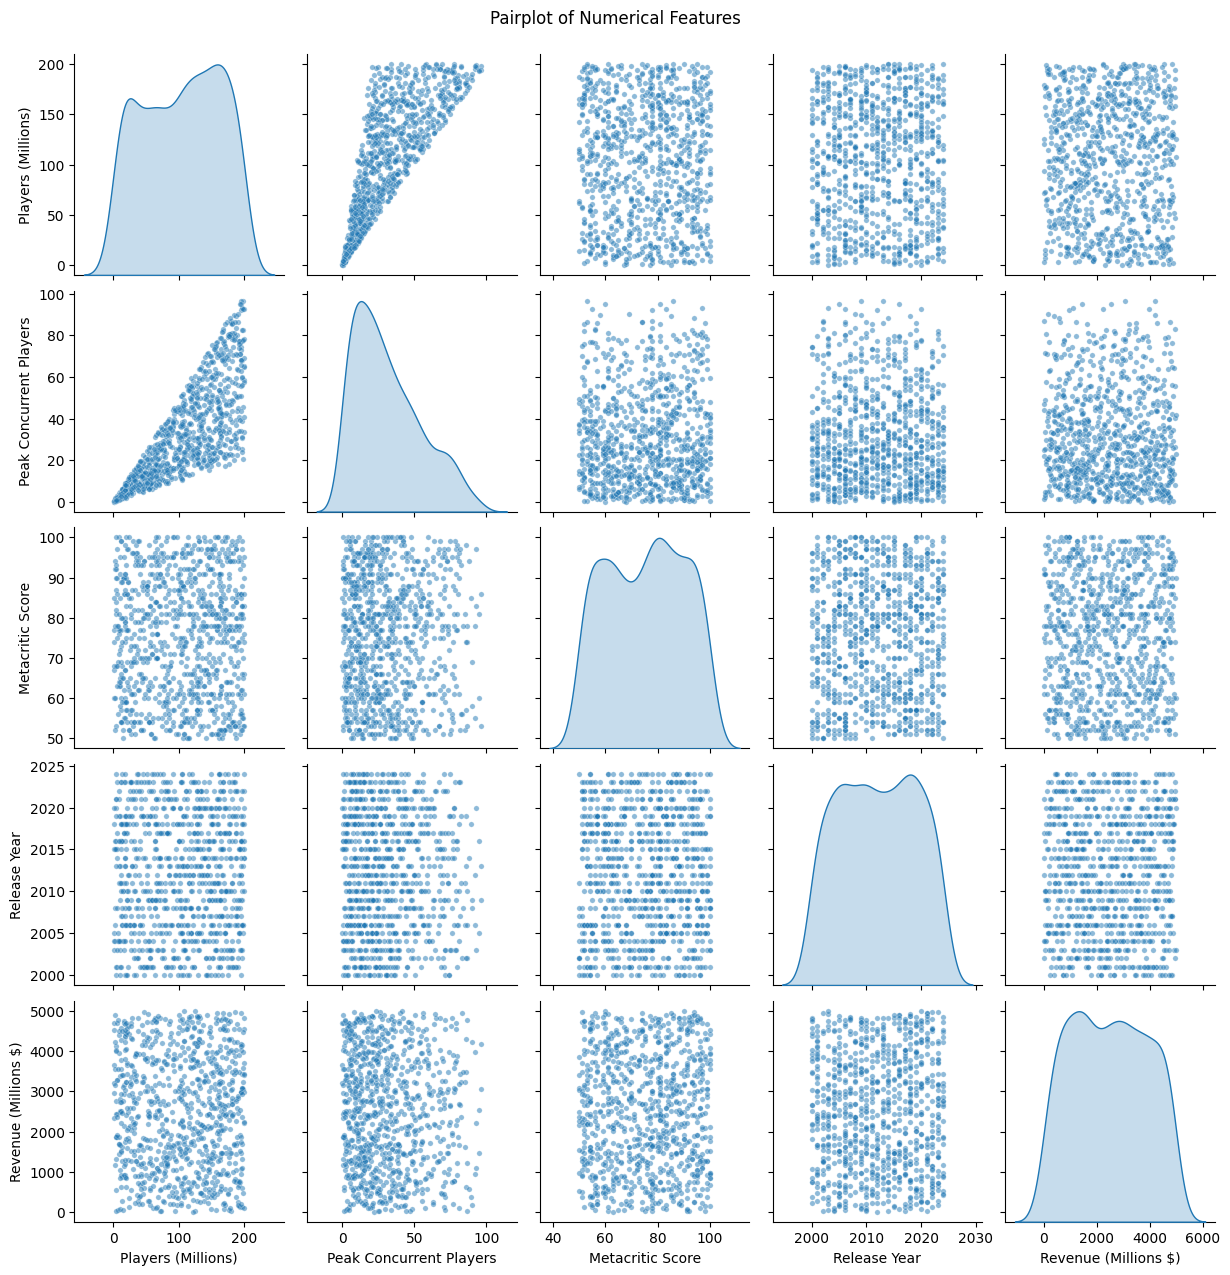

In [96]:
import seaborn as sns
df = pd.read_csv('./data/decoding-gaming-trends/train.csv')
numerical_features = ["Players (Millions)", "Peak Concurrent Players", "Metacritic Score", "Release Year", "Revenue (Millions $)"]
sns_plot = sns.pairplot(df[numerical_features], diag_kind="kde", plot_kws={'alpha':0.5, 's':15})
plt.suptitle("Pairplot of Numerical Features", y=1.02)
fig = sns_plot.figure
fig.savefig("plot1.png")
plt.show()


#### Add a new feature of Engagement Ratio and remove all the unwanted parameters

In [97]:
data['Enagagement Ratio'] = data['Peak Concurrent Players']/data['Players (Millions)']

Y_init = data['Revenue (Millions $)']

modified_data = data.drop(columns=['Genre','Release Year','Developer','Revenue (Millions $)'])

temp_data = modified_data


modified_data = pd.get_dummies(modified_data,columns=['Platform','Trending Status'])    

modified_data.replace({True:1,False:0},inplace=True)

modified_data.drop(columns=['Game Title'],inplace=True)

# modified_data.head()
# print(modified_data.shape)

/tmp/ipykernel_10816/3952711476.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modified_data.replace({True:1,False:0},inplace=True)


In [98]:
X_test,X_train,Y_test,Y_train = train_test_split(modified_data,Y_init,test_size=0.9,train_size=0.1,random_state=10)


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.head()
X_train.replace({'Yes':1,'No':0},inplace=True)
X_test.replace({'Yes':1,'No':0},inplace=True)
X_normalised = scaler.fit_transform(X_train)

X_test_normalised = scaler.fit_transform(X_test)


/tmp/ipykernel_10816/1942377194.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.replace({'Yes':1,'No':0},inplace=True)
/tmp/ipykernel_10816/1942377194.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.replace({'Yes':1,'No':0},inplace=True)


In [100]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter=100000)

regressor.fit(X_normalised,Y_train)



# w_final = regressor.coef_
# b_final = regressor.intercept_

# ypredicted = np.dot(X_normalised,w_final)+b_final

# print(ypredicted[0:10])


SGDRegressor(max_iter=100000)

In [101]:
from sklearn.metrics import mean_squared_error

y_predict = regressor.predict(X_test_normalised)


mean_squared_error(Y_test,y_predict)

1823854.8815680367

In [102]:
temp_data.drop(columns=['Game Title'],inplace=True)
temp_data.replace({True:1,False:0},inplace=True)
temp_data.replace({'Yes':1,'No':0},inplace=True)
temp_data.head()

/tmp/ipykernel_10816/1212502689.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_data.replace({'Yes':1,'No':0},inplace=True)


,Platform,Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status,Enagagement Ratio
0,Xbox,33.84,12.00,96,0,Declining,0.354610
1,Cross-Platform,162.57,37.76,91,1,Stable,0.232269
2,PC,164.85,70.99,85,0,Rising,0.430634
3,PC,118.68,41.95,88,1,Stable,0.353472
4,Nintendo Switch,64.07,17.56,84,1,Stable,0.274075


In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pickle


# print(temp_data.shape)


# transformer = ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse_output=False,dtype=np.int32,drop='first'),['Platform','Esports Popularity','Trending Status'])],remainder='passthrough')
transformer = ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse_output=False,dtype=np.int32,drop='first'),['Trending Status','Platform'])],remainder='passthrough')


xans = transformer.fit_transform(temp_data)


X_te1,X_t1,Y_te1,Y_t1 = train_test_split(xans,Y_init,test_size=0.8,train_size=0.2)

X_t1 = scaler.fit_transform(X_t1)
X_te1 = scaler.fit_transform(X_te1)

model = regressor.fit(X_t1,Y_t1)

with open("./model.pkl","wb") as file:
    pickle.dump(model,file)

print(X_te1.shape)

y_final = regressor.predict(X_te1)

mean_squared_error(Y_te1,y_final)



(180, 12)


1909274.2861633105

In [104]:
test_data = pd.read_csv('./data/decoding-gaming-trends/test.csv')
test_data

,Game Title,Genre,Platform,Release Year,Developer,Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Neon Speed 5,Strategy,Xbox,2011,Capcom,77.99,21.44,69,No,Stable
1,Neon Speed 4,Strategy,Cross-Platform,2008,Sony,110.52,30.57,78,No,Declining
2,Cyber Quest 3,Action,Mobile,2002,Ubisoft,57.48,15.39,82,No,Declining
3,Warzone Chronicles 3,Strategy,PC,2019,EA,58.03,18.59,71,No,Rising
4,Cyber Quest 2,Strategy,Mobile,2019,Activision,181.32,48.06,93,Yes,Rising
...,...,...,...,...,...,...,...,...,...,...
95,Pixel Odyssey 1,Strategy,Cross-Platform,2004,Microsoft,132.49,49.23,63,Yes,Declining
96,Battle Warriors 4,Adventure,PlayStation,2020,Square Enix,78.04,36.60,64,No,Stable
97,Pixel Odyssey 4,Racing,Mobile,2004,Microsoft,190.78,65.44,55,No,Stable
98,Battle Warriors 4,Simulation,PlayStation,2016,Capcom,152.19,28.36,68,Yes,Declining


In [105]:
test_data['Engagement Ratio'] = test_data['Peak Concurrent Players']/test_data['Players (Millions)']

modified_data = test_data.drop(columns=['Genre','Release Year','Developer','Game Title'])

# modified_data.drop(columns=['Game Title'],inplace=True)


temp_data = modified_data


temp_data.replace({'Yes':1,'No':0},inplace=True)


transformer = ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse_output=False,dtype=np.int32,drop='first'),['Trending Status','Platform'])],remainder='passthrough')

xans = transformer.fit_transform(temp_data)

X_normalised = scaler.fit_transform(xans)

print(X_normalised.shape)

y_predict_final = regressor.predict(X_normalised)

y_predict_final




(100, 12)


/tmp/ipykernel_10816/310181064.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_data.replace({'Yes':1,'No':0},inplace=True)


array([2500.28696718, 2488.24072492, 2491.11542494, 2399.27304265,
       2791.77234848, 2462.63974706, 2543.77474665, 2292.99194771,
       2506.57689405, 2229.17679351, 2625.99621529, 2726.2600454 ,
       2579.07883389, 2607.1887305 , 2333.76022596, 2592.76648528,
       2491.88520396, 2689.68652164, 2785.66148061, 2635.49641167,
       2476.14609617, 2571.98399309, 2379.53099209, 2714.19447657,
       2364.87740371, 2728.22456869, 2538.90810058, 2567.69957447,
       2665.70316326, 2536.75619909, 2522.25472396, 2608.58673323,
       2314.30850988, 2575.30473176, 2583.50024296, 2607.5582465 ,
       2260.54216054, 2641.37329091, 2421.41289961, 2638.12420095,
       2659.76021627, 2755.40241001, 2329.46428244, 2540.92020223,
       2404.06448366, 2455.77800536, 2162.21570806, 2464.68410231,
       2484.26531987, 2465.45200578, 2364.72776646, 2712.4297268 ,
       2688.54446334, 2606.63455692, 2482.98921532, 2287.02182484,
       2364.58288636, 2528.12973032, 2419.94428773, 2293.34894

#### Save the Result in a csv file

In [106]:
import csv
# col1 = 'ID'
# col2 = 'Revenue (Millions $)'
final_output = []
final_output.append(["ID","Revenue (Millions $)"])

for i,val in enumerate(y_predict_final):
    final_output.append([i+1,float(val)])

with open('./output.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(final_output)
